In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Bidirectional
from tensorflow.keras.optimizers import Adam

In [2]:
real = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real['target'] = 1
fake['target'] = 0
df = pd.concat([real,fake])
df['title'] = df['title']+' '+df['text']
df.drop(['text','subject','date'],axis=1,inplace=True)
df.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [5]:
df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [6]:
def clean_text(text):
    text=re.sub('[^a-zA-Z]',' ',text)
    text=text.lower()
    text=text.split()
    text=' '.join(text)
    return text
df['title'] = df['title'].map(lambda x: clean_text(x))
df['title']

0        as u s budget fight looms republicans flip the...
1        u s military to accept transgender recruits on...
2        senior u s republican senator let mr mueller d...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
23476    mcpain john mccain furious that iran treated u...
23477    justice yahoo settles e mail privacy class act...
23478    sunnistan us and allied safe zone plan to take...
23479    how to blow million al jazeera america finally...
23480    u s navy sailors held by iranian military sign...
Name: title, Length: 44898, dtype: object

In [7]:
X = df['title']
y=df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
num_words_train = len(X_train)
num_words_test = len(X_test)

max_length = 50

In [10]:
tokenizer = Tokenizer(num_words = num_words_train)
tokenizer.fit_on_texts(X_train)

In [11]:
word_index_train = tokenizer.word_index

In [12]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [13]:
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding='post', truncating='post')

In [14]:
train_padded[0]

array([  875,   368,  2048,    33,   283,  1861,  2873,     9,   518,
           2,   750,   494,    16,  1074,   613,     2,   149,  1684,
        1157,   149,    21,    44,    89,   875,   368,     6,    75,
         158,    29,    28, 14409,   959,    55,    90,     1,  2420,
           5,   502,    10,     1,  1103,     5,   124,     3,    75,
         330,   100,    54,    33,    84], dtype=int32)

In [15]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding='post', truncating='post')

In [16]:
model = Sequential()
model.add(Embedding(num_words_train,20,input_length=max_length))
model.add(Bidirectional(LSTM(32,dropout=0.1,recurrent_dropout=0.1)))
model.add((Dense(1, activation='sigmoid')))

model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            718360    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                13568     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 731,993
Trainable params: 731,993
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_padded,y_train,epochs=4,validation_data=(test_padded,y_test))

Epoch 1/4
1123/1123 [==============================] - 107s 95ms/step - loss: 0.2153 - accuracy: 0.8968 - val_loss: 0.0266 - val_accuracy: 0.9934
Epoch 2/4
1123/1123 [==============================] - 106s 95ms/step - loss: 0.0142 - accuracy: 0.9975 - val_loss: 0.0123 - val_accuracy: 0.9973
Epoch 3/4
1123/1123 [==============================] - 106s 95ms/step - loss: 0.0063 - accuracy: 0.9989 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 4/4
1123/1123 [==============================] - 107s 95ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0059 - val_accuracy: 0.9987


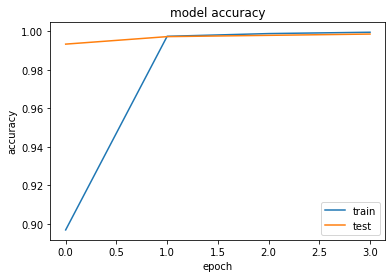

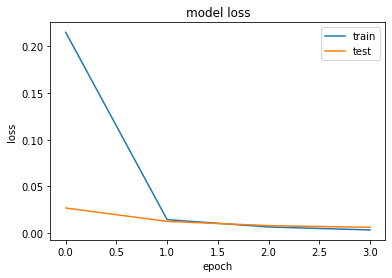

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
99.87

99.87